## MediaPipe Hands Demo

In [1]:
import cv2
from PIL import Image
from utils.keypoint import DetectHandKeypoint

In [2]:


detector = DetectHandKeypoint()
img = cv2.imread('datasets/Gesture/d/d_3.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = detector(img_rgb)
keypoints = detector.get_keypoint_list(results.multi_hand_landmarks[0].landmark)
keypoints

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
/home/we2060/anaconda3/envs/AD/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


[0.4860430061817169,
 0.8295611143112183,
 0.6665681004524231,
 0.5686064958572388,
 0.49289634823799133,
 0.316055029630661,
 0.6350358724594116,
 0.24668514728546143,
 0.6095723509788513,
 0.03970050811767578,
 0.48593100905418396,
 0.2989979088306427,
 0.5423980951309204,
 0.5191080570220947,
 0.3951612114906311,
 0.3955288529396057,
 0.46636563539505005,
 0.6104665994644165,
 0.32098066806793213,
 0.4839574992656708,
 0.37239277362823486,
 0.6379902362823486]

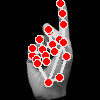

In [3]:
detector.plot(img, results.multi_hand_landmarks[0])
Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Generate Dataset

In [4]:
import os
import glob

In [5]:
dataset_root = 'datasets/Gesture/'
gesture_list = os.listdir(dataset_root)
gesture_list

['d', 'y', 'f', 'v']

In [6]:
from tqdm import tqdm
dataset_csv = []

for gesture in gesture_list:
    image_path_list = glob.glob(f'{dataset_root}/{gesture}/*.jpg')
    for i in tqdm(range(len(image_path_list))):
        # Get image_name
        image_name = image_path_list[i].split('/')[-1]
        # Read numpy image
        img = cv2.imread(image_path_list[i])
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Get predicted results
        results = detector(img_rgb)
        # Get all skeletons
        if results.multi_hand_landmarks:
            keypoint_list = detector.get_keypoint_list(results.multi_hand_landmarks[0].landmark)

            # keypoint_list = detector.get_keypoint_list(keypoint)
            # inset image name, label in index 0, 1
            keypoint_list.insert(0, image_name)
            keypoint_list.insert(1, gesture)
            dataset_csv.append(keypoint_list)

100%|██████████| 1500/1500 [00:31<00:00, 47.65it/s]


## Write Dataset 

In [7]:
import csv

# write csv
header = [
    'image_name', 'label',
    # wrist
    'wrist_x', 'wrist_y',
    # thumb
    'thumb_mcp_x', 'thumb_mcp_y',
    'thumb_tip_x', 'thumb_tip_y',
    # index finger
    'index_finger_pip_x', 'index_finger_pip_y',
    'index_finger_tip_x', 'index_finger_tip_y',
    # middle finger
    'middle_finger_pip_x', 'middle_finger_pip_y',
    'middle_finger_tip_x', 'middle_finger_tip_y',
    # ring finger
    'ring_finger_pip_x', 'ring_finger_pip_y',
    'ring_finger_tip_x', 'ring_finger_tip_y',
    # pinky finger
    'pinky_finger_pip_x', 'pinky_finger_pip_y',
    'pinky_finger_tip_x', 'pinky_finger_tip_y'
]

csv_path = os.path.join(dataset_root, 'keypoints.csv')

with open(csv_path, 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)
    # write multiple rows
    writer.writerows(dataset_csv)

In [8]:
import pandas as pd

df = pd.read_csv(csv_path)
df.head()

,image_name,label,wrist_x,wrist_y,thumb_mcp_x,thumb_mcp_y,thumb_tip_x,thumb_tip_y,index_finger_pip_x,index_finger_pip_y,...,middle_finger_tip_x,middle_finger_tip_y,ring_finger_pip_x,ring_finger_pip_y,ring_finger_tip_x,ring_finger_tip_y,pinky_finger_pip_x,pinky_finger_pip_y,pinky_finger_tip_x,pinky_finger_tip_y
0,d_692.jpg,d,0.618151,0.876113,0.705054,0.615049,0.422460,0.450940,0.631901,0.277557,...,0.549780,0.543019,0.385581,0.501556,0.526133,0.623931,0.361523,0.623654,0.489014,0.710604
1,d_420.jpg,d,0.411787,0.819458,0.466265,0.599594,0.376716,0.498577,0.417343,0.384985,...,0.405332,0.596215,0.349775,0.520015,0.375494,0.640230,0.320038,0.575412,0.340712,0.658984
2,d_840.jpg,d,0.460546,0.912746,0.604421,0.735319,0.469869,0.609714,0.607432,0.367080,...,0.480922,0.579544,0.357676,0.487423,0.410179,0.624444,0.282997,0.583172,0.348465,0.650387
3,d_1483.jpg,d,0.612783,0.973389,0.651738,0.690360,0.473596,0.561144,0.623126,0.476593,...,0.544173,0.646420,0.424313,0.612456,0.517804,0.724607,0.387420,0.676069,0.471215,0.761102
4,d_798.jpg,d,0.559466,1.039490,0.714575,0.826325,0.553946,0.656391,0.605815,0.397054,...,0.590521,0.682558,0.472580,0.607049,0.531682,0.783548,0.404718,0.682563,0.457287,0.793659
